# Introduction to Jupyter
## Basics

### Run code

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

n = 100
x = np.linspace(-20, 20, n)
y = np.sin(x) + np.random.normal(loc = 0.0, scale=0.2, size = n)

df = pd.DataFrame({'x': x,
                   'y': y}
                 )

### Pretty Printing

In [30]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
df.head()

,x,y
0,-20.000000,-1.035782
1,-19.595960,-0.236060
2,-19.191919,-0.158073
3,-18.787879,0.135394
4,-18.383838,0.850896


### Plotting

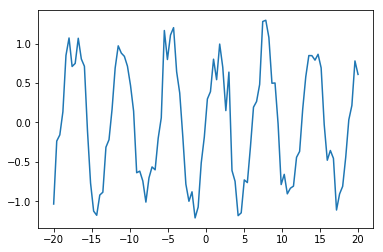

In [31]:
plt.plot(df.x, df.y);

### Show Docstrings

`shift-tab` will allow you to see the docstring for self-defined functions or those from libraries.

In [59]:
def fibonacci(n):
    """
    Calculate the nth value of the fibonacci sequence
    
    Parameters
    ----------
    n : int
        The nth value in the sequence to be returned.

    Returns
    ----------
    b : int
        Integer value of the fibonacci sequence's nth value.
    """
    a, b = 0, 1
    for _ in range(1, n):
        a, b = b, a + b
    return b

In [33]:
print(fibonacci(10))

55


Alternatively, a function can be preceeded by `?` to print out the docstring's contents.

In [61]:
?fibonacci

Signature: fibonacci(n)
Docstring:
Calculate the nth value of the fibonacci sequence

Parameters
----------
n : int
    The nth value in the sequence to be returned.

Returns
----------
b : int
    Integer value of the fibonacci sequence's nth value.
File:      ~/Documents/other/jupyter_demo/<ipython-input-59-587b2f1659c0>
Type:      function


## Calling other languages

By simply installing the necessary kernel, almost any other language can be used within a Jupyter notebook. For example, we can call R code into out Python notebook by first loading the R kernel. If this is not present on your system, you may need to install it through `conda install -c r rpy2`

In [35]:
%load_ext rpy2.ipython

Once loaded, we can write R code into a cell by decorating our cell with an `%%R` statement. Despite the cell operating upon an R kernel, we are still able to make use of the variables calculated and defined previously within the Python components of the notebook.

/opt/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


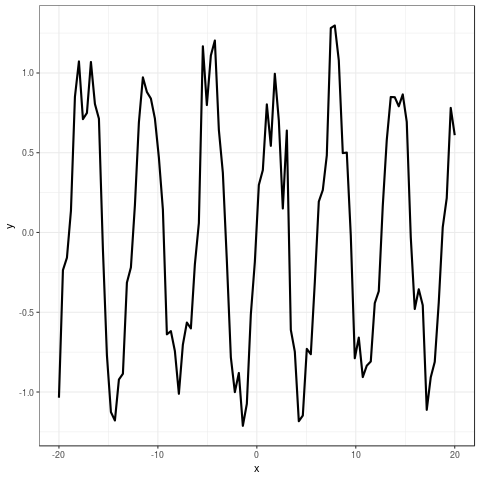

In [36]:
%%R -i df 
library(ggplot2)

ggplot(data=df, aes(x = x, y = y)) + 
    geom_line(size=1) + 
    theme_bw()

## Magic Commands

Magic commands sit at the top of a cell and extend the capability of a notebook. All magic commands are preceeded by `%`.

### Removing Objects

Using the `%reset_selective` magic command we can remove objects and methods from our workspace through explicit naming or regex. The entire workspace can be cleared through `%reset`. In the below example, the `fibonacci()` function has been removed with the `-f` argument forcing the function's deletion.

In [37]:
# Remove fibonacci function
%reset_selective -f fibonacci

We can now test the function has successfully been removed:

In [ ]:
try: 
    fibonacci(10)
except NameError:
    print('Fibonacci function not in workspace.')

### Loading External Notebooks

Jupyter allows for notebooks to be loaded as modules, just like in regular python file structures. To do this, we use the `%run` magic function to load a second notebook into our workspace.

In [64]:
%run nbs/external_nb.ipynb
try: 
    print(fibonacci(10))
except NameError:
    print('Fibonacci function not in workspace.')

55


### Writing Cython 

Cython allows for base Python to be accelerated by embedding compiled C code into the workflow. Typically this involves writing the code in seperate files and compiling it in the terminal before loading the _cythonised_ function into the python workflow. Jupyter allows for this to all be done in a single notebook through the `%load_ext` magic command.

In [39]:
%load_ext Cython

We can then cythonise our original Python code making no changes to the original Fibonacci function other than adding the `%%cython` decorator. The `-a` argument instructs Jupyter to analyse the Cython code and identify areas that are bottlenecking the code due to the code being Python, not C.

In [40]:
%%cython -a
def fibonacci_cy_initial(n):
    a, b = 0, 1
    for _ in range(1, n):
        a, b = b, a + b
    return b


Using this information, we can rewrite our first attempt at Cython code using some native C commands.

In [41]:
%%cython -a 

def fibonacci_cy_opt(n):
    cdef int _
    cdef int a=0, b=1
    for _ in range(1, n):
        a, b = b, a + b
    return b

### Timing Functions

One particularly useful feature in Jupyter is the native ability to benchmark the speed of code by simply decorating a cell with `%time` or `%timeit`. The former will test the speed of a single run of the code and the second will take the average of 100,000 runs, although this number can be controlled by the `-n` argument.

Cell timing can either be done on a single line of code:

In [42]:
%time fibonacci(10)
print('-'*80)
%time fibonacci_cy_initial(10)
print('-'*80)
%time fibonacci_cy_opt(10)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 11.7 µs


55

--------------------------------------------------------------------------------
CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 10.5 µs


55

--------------------------------------------------------------------------------
CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 14.5 µs


55

Or the entire cell with a double `%` decorator:

In [43]:
%%timeit
fibonacci(100)

4.3 µs ± 13.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### Speed Comparison

Output can also be stored in a variable for speed comparison. Here we will test our `fibonacci()` function in pure Python against its Cythonised equivalent.

In [44]:
n_runs = 100000
cy_speed_initial = %timeit -n $n_runs -o -q fibonacci_cy_initial(100)
cy_speed_opt = %timeit -n $n_runs -o -q fibonacci_cy_opt(100)
py_speed = %timeit -n $n_runs -o -q fibonacci(100)

In [45]:
print('Cythonised code is on average {:.3f} times faster than Python over {} runs.'.format(py_speed.average/cy_speed_opt.average, n_runs))
print('-'*80)
print('Optimised Cython code is on average {:.3f} times faster than simple Cython code over {} runs.'.format(cy_speed_initial.average/cy_speed_opt.average, n_runs))
print('-'*80)
print('Simple Cython code is on average {:.3f} times faster than Python code over {} runs.'.format(py_speed.average/cy_speed_initial.average, n_runs))


Cythonised code is on average 35.722 times faster than Python over 100000 runs.
--------------------------------------------------------------------------------
Optimised Cython code is on average 20.696 times faster than simple Cython code over 100000 runs.
--------------------------------------------------------------------------------
Simple Cython code is on average 1.726 times faster than Python code over 100000 runs.


## Final Points

### Execute Terminal Commands

In [46]:
!ls
print('-'*80)
!pwd

analysis.ipynb	   external_py.py  intro.ipynb	  requirements.txt
data		   heatmaps	   __pycache__	  rfiles.txt
external_nb.ipynb  init.sh	   pythoncode.py  test.nc
--------------------------------------------------------------------------------
/home/pindert2/Documents/other/jupyter_demo


### Extending to Shell Scripts
This functionality is not limited to individual commands as shell scripts can be invoked from within the notebook.

In [47]:
%%script bash

touch example_file.txt
export MINIDX=2  

Fibonacci ()
{
    idx=$1                
    if [ "$idx" -lt "$MINIDX" ]; then
        echo "$idx"              
    else
        (( --idx ))              
        term1=$( Fibonacci $idx )       

        (( --idx ))              
        term2=$( Fibonacci $idx )       

        echo $(( term1 + term2 ))
    fi
}

for (( i=0; i<=10; i++ ))
do                      
    FIBO=$(Fibonacci $i)
    if [ i == 0 ]
    then
        echo "$FIBO " > example_file.txt
    else
        echo "$i term: $FIBO " >> example_file.txt
    fi
done

echo "Fibonacci Sequence:"
echo
cat example_file.txt

rm example_file.txt

Fibonacci Sequence:

0 term: 0 
1 term: 1 
2 term: 1 
3 term: 2 
4 term: 3 
5 term: 5 
6 term: 8 
7 term: 13 
8 term: 21 
9 term: 34 
10 term: 55 


### What's in the Enviornment?

`%whos` prints out a list of the objects loaded into the current environment, accompanied by add.

In [48]:
%whos

Variable               Type                          Data/Info
--------------------------------------------------------------
InteractiveShell       MetaHasTraits                 <class 'IPython.core.inte<...>eshell.InteractiveShell'>
cy_speed_initial       TimeitResult                  2.53 µs ± 31.9 ns per loo<...> runs, 100000 loops each)
cy_speed_opt           TimeitResult                  122 ns ± 1.4 ns per loop <...> runs, 100000 loops each)
df                     DataFrame                                 x         y\n<...>n\n[100 rows x 2 columns]
fibonacci              function                      <function fibonacci at 0x7fd105b8bf28>
fibonacci_cy_initial   builtin_function_or_method    <built-in function fibonacci_cy_initial>
fibonacci_cy_opt       builtin_function_or_method    <built-in function fibonacci_cy_opt>
hello                  function                      <function hello at 0x7fd1547be510>
n                      int                           100
n_runs           

## Set Environment Variables

Within a notebook a large number of configurable variables exist. An extensive list looks like:

In [49]:
%env OMP_NUM_THREADS=4

env: OMP_NUM_THREADS=4


### Full List of Magic Commands

All other magic commands can be printed using `%lsmagic`:

In [50]:
%lsmagic

Available line magics:
%R  %Rdevice  %Rget  %Rpull  %Rpush  %alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hello  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%R  %%SVG  %%bash  %%capture  %%cython  %%cython_inline  %%cython_pyximport  %%debug  

## Storing Variables

In [51]:
to_pass = 'Lets pass this variable.'
%store to_pass

Stored 'to_pass' (str)


In another notebook now type `%store -r to_pass` and `to_pass` will be available.

### Defining Your Own Magic Commands

While a large number of magic commands exist within base Jupyter, there may be such an instance that you would like to create your own. Using the below example we are able to do this.

In [54]:
from IPython.core.magic import (register_line_magic, register_cell_magic)

In [55]:
@register_line_magic
def hello(line):
    if line == 'french':
        print("Bonjour DNSE!")
    else:
        print("Hello DSNE!")

In [56]:
%hello 


Hello DSNE!


In [57]:
%hello french

Bonjour DNSE!
